# Model 1 - CNN

### Fetching Data

In [197]:
import numpy as np

In [198]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [199]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45, 200), (15, 200), (45,), (15,))

In [200]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
y_train.shape,y_test.shape

((45, 4), (15, 4))

In [201]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((45, 40, 5), (15, 40, 5))

In [202]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))

In [203]:
#shapes
x_train.shape,x_test.shape

((45, 40, 5, 1), (15, 40, 5, 1))

### Building the Model

In [204]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras import metrics

In [205]:
#forming model
model=Sequential()

In [206]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(4,activation="softmax"))

In [207]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [190]:
#compiling
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

### Training the Model

In [226]:
#training the model
model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
1/1 [==============================] - 0s 91ms/step - loss: 0.5013 - accuracy: 0.6444 - val_loss: 0.4418 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 0.4402 - accuracy: 0.7556 - val_loss: 0.4446 - val_accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.4362 - accuracy: 0.7111 - val_loss: 0.4323 - val_accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 0.4346 - accuracy: 0.7333 - val_loss: 0.4250 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 0.4576 - accuracy: 0.6667 - val_loss: 0.4242 - val_accuracy: 0.9333
Epoch 6/100
1/1 [==============================] - 0s 109ms/step - loss: 0.4553 - accuracy: 0.7111 - val_loss: 0.4230 - val_accuracy: 0.9333
Epoch 7/100
1/1 [==============================] - 0s 93ms/step - loss: 0.4468 - accuracy: 0.6889 - val_loss: 0.4268 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 76ms/step - loss: 0.4435 - accuracy: 0.7556 - val_loss: 0.4196 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 64ms/step - loss: 0.4474 - accuracy: 0.7556 - val_loss: 0.4210 - val_accuracy: 0.6667
Epoch 61/100
1/1 [==============================] - 0s 85ms/step - loss: 0.4001 - accuracy: 0.7778 - val_loss: 0.4223 - val_accuracy: 0.6667
Epoch 62/100
1/1 [==============================] - 0s 90ms/step - loss: 0.4381 - accuracy: 0.7556 - val_loss: 0.4178 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 69ms/step - loss: 0.4211 - accuracy: 0.7556 - val_loss: 0.4132 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 65ms/step - loss: 0.3954 - accuracy: 0.7111 - val_loss: 0.4187 - val_accuracy: 0.6667
Epoch 65/100
1/1 [==============================] - 0s 54ms/step - loss: 0.3950 - accuracy: 0.8444 - val_loss: 0.4259 - val_accuracy: 0.6667
Epoch 66/100
1/1 [========

### Final Results

In [227]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

1/1 [==============================] - 0s 22ms/step - loss: 0.3465 - accuracy: 1.0000
[0.3444773852825165, 1.0]
[0.3465260863304138, 1.0]


In [228]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


Test loss: 0.3465260863304138
Test accuracy: 1.0


In [229]:
pred = model.predict(x_test) 
pred = np.argmax(pred, axis = 1)[:10] 
label = np.argmax(y_test,axis = 1)[:10] 

print(pred) 
print(label)

1/1 [==============================] - 0s 20ms/step
[1 1 1 1 1 2 2 2 2 2]
[1 1 1 1 1 2 2 2 2 2]


In [230]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [232]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])


In [245]:
# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))


Epoch 1/100
1/1 [==============================] - 1s 610ms/step - loss: 0.0678 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0032 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 175ms/step - loss: 0.0299 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0061 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 177ms/step - loss: 0.0348 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0084 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0378 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0094 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - v

1/1 [==============================] - 0s 173ms/step - loss: 0.0584 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0122 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 170ms/step - loss: 0.0664 - acc: 0.9333 - f1_m: 0.9333 - precision_m: 0.9333 - recall_m: 0.9333 - val_loss: 0.0042 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 185ms/step - loss: 0.0391 - acc: 0.9778 - f1_m: 0.9778 - precision_m: 0.9778 - recall_m: 0.9778 - val_loss: 0.0059 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 159ms/step - loss: 0.0647 - acc: 0.9111 - f1_m: 0.9111 - precision_m: 0.9111 - recall_m: 0.9111 - val_loss: 0.0068 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall

1/1 [==============================] - 0s 183ms/step - loss: 0.0240 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 192ms/step - loss: 0.0432 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0037 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 182ms/step - loss: 0.0576 - acc: 0.9778 - f1_m: 0.9778 - precision_m: 0.9778 - recall_m: 0.9778 - val_loss: 0.0086 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 169ms/step - loss: 0.0763 - acc: 0.9333 - f1_m: 0.9333 - precision_m: 0.9333 - recall_m: 0.9333 - val_loss: 0.0034 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall

1/1 [==============================] - 0s 161ms/step - loss: 0.0495 - acc: 0.9556 - f1_m: 0.9556 - precision_m: 0.9556 - recall_m: 0.9556 - val_loss: 0.0091 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0190 - acc: 0.9778 - f1_m: 0.9778 - precision_m: 0.9778 - recall_m: 0.9778 - val_loss: 0.1090 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 171ms/step - loss: 0.1026 - acc: 0.8889 - f1_m: 0.8889 - precision_m: 0.8889 - recall_m: 0.8889 - val_loss: 0.0227 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 166ms/step - loss: 0.0285 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recal

In [237]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


In [243]:
print("loss : " + str(loss))
print("Accuracy : " + str(accuracy))
print("F1_Score : " + str(f1_score))
print("Precision : " + str(precision))
print("Recall : " + str(recall))

loss : 0.010320430621504784
Accuracy : 1.0
F1_Score : 1.0
Precision : 1.0
Recall : 1.0


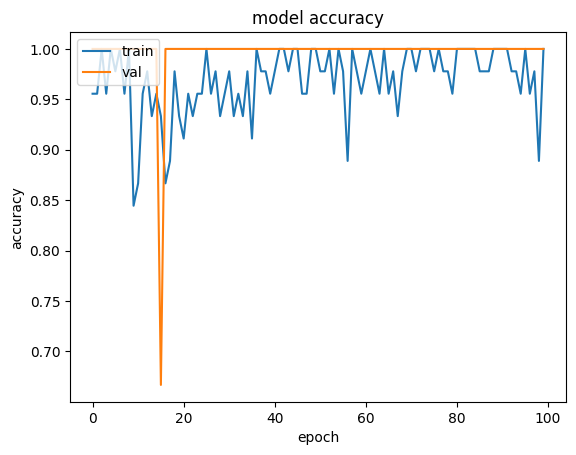

In [246]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

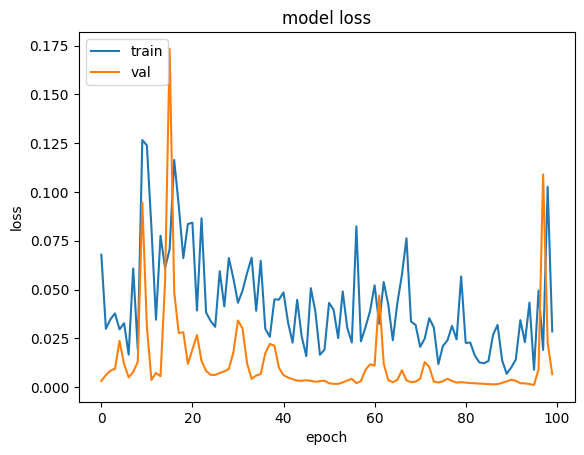

In [247]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

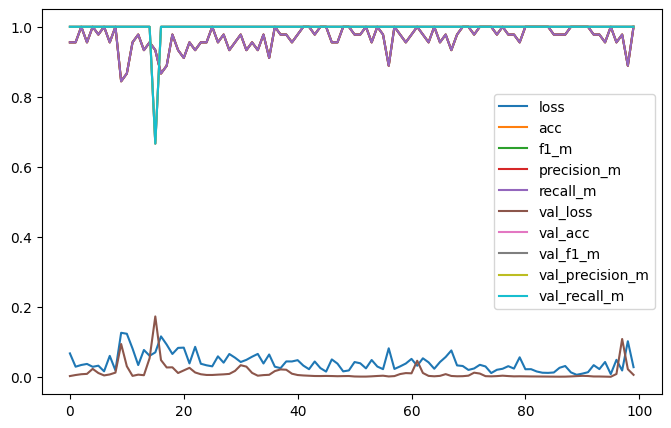

In [249]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()